In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# import train and test dataset
df_train = pd.read_csv('data.csv', encoding="ISO-8859-1")
df_train.head()

,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,...,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,...,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,PATIENT DECLINED TO ANSWER,...,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK/AFRICAN AMERICAN,...,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2
3,F,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,UNKNOWN/NOT SPECIFIED,...,3.0,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3
4,F,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,WHITE,...,2.0,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4


# Null

In [4]:
## get shape of actual train dataframe
num_train = df_train.shape[0]
print(num_train)

48976


In [5]:
#missing values
print ("\nMissing values :  ", df_train.isnull().sum().values.sum())



Missing values :   15647


In [6]:
df_train.isnull().sum()

gender                       0
age                          0
hospitalization              0
admission_type               0
admission_origin          3576
admission_diagnosis         21
insurance                  830
religion                   378
marital_status            8649
ethnicity                  701
num_callouts                 0
num_diagnoses                0
num_procedures               0
admission_procedure       1492
num_cptevents                0
num_inputevents              0
num_labevents                0
num_microbiologyevents       0
num_noteevents               0
num_outputevents             0
num_procedureevents          0
num_transfers                0
num_chartevents              0
expired                      0
patient_id                   0
dtype: int64

# Outliers detection

num_callouts 99 percentiles


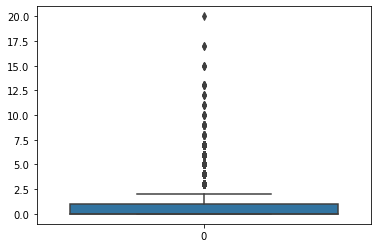

q_50= 0.0 q_99= 2.0
count    48976.000000
mean         0.392396
std          0.609453
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: num_callouts, dtype: float64


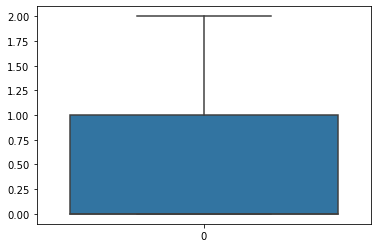

num_diagnoses 99 percentiles


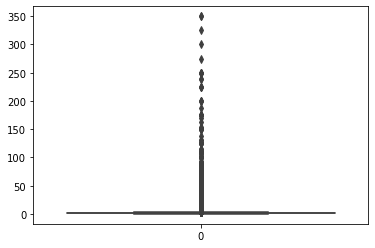

q_50= 1.0 q_99= 7.0
count    48976.000000
mean         1.686602
std          1.331372
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: num_diagnoses, dtype: float64


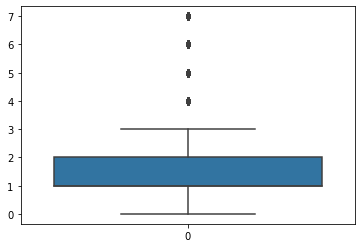

num_procedures 99 percentiles


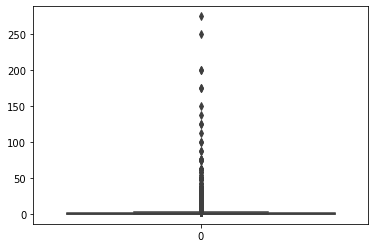

q_50= 0.0 q_99= 2.0
count    48976.000000
mean         0.408996
std          0.568573
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: num_procedures, dtype: float64


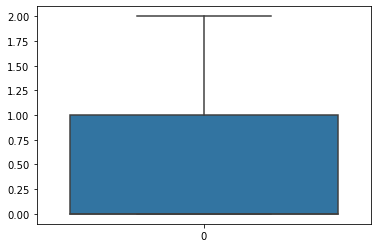

num_cptevents 99 percentiles


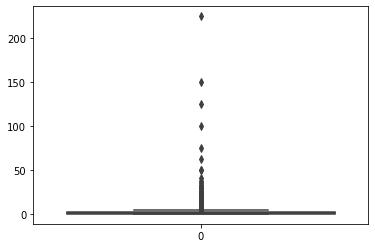

q_50= 1.0 q_99= 3.0
count    48976.000000
mean         0.917960
std          0.868769
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: num_cptevents, dtype: float64


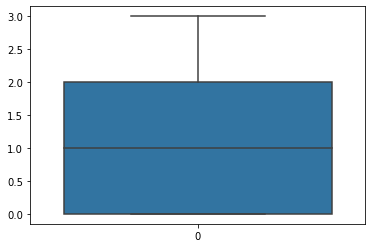

num_inputevents IQR approach


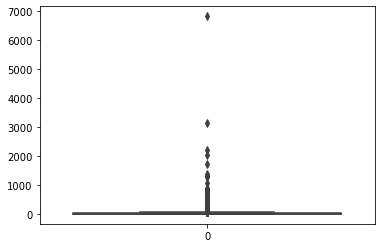

5.0 14.0 34.0 77.5
4252


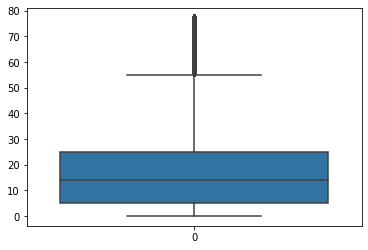

count    48976.000000
mean        17.731215
std         17.345418
min          0.000000
25%          5.000000
50%         14.000000
75%         25.000000
max         77.000000
Name: num_inputevents, dtype: float64
num_labevents IQR approach


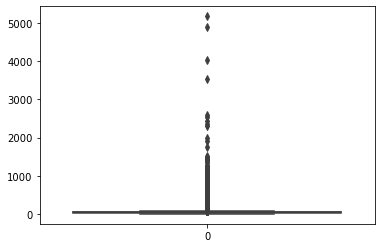

27.0 39.0 51.0 87.0
2724


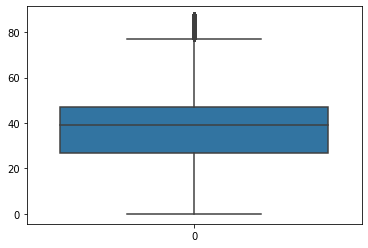

count    48976.000000
mean        36.860115
std         18.024838
min          0.000000
25%         27.000000
50%         39.000000
75%         47.000000
max         87.000000
Name: num_labevents, dtype: float64
num_microbiologyevents 99 percentiles


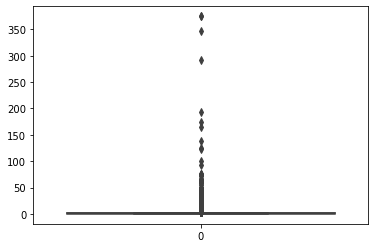

q_50= 1.0 q_99= 4.0
count    48976.000000
mean         0.781321
std          0.981357
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: num_microbiologyevents, dtype: float64


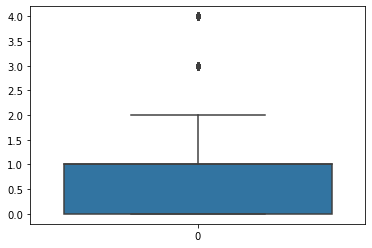

num_noteevents 99 percentiles


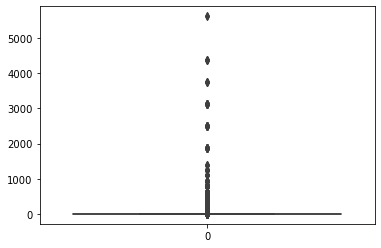

q_50= 0.0 q_99= 5.0
count    48976.000000
mean         0.474784
std          0.871333
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: num_noteevents, dtype: float64


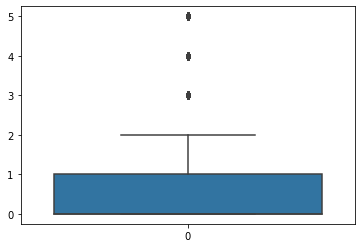

num_outputevents 99 percentiles


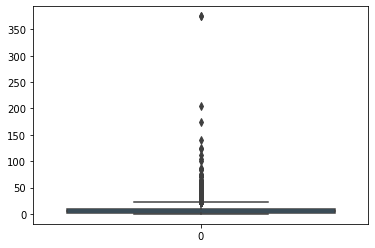

q_50= 5.0 q_99= 20.0
count    48976.000000
mean         6.093168
std          5.224499
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         20.000000
Name: num_outputevents, dtype: float64


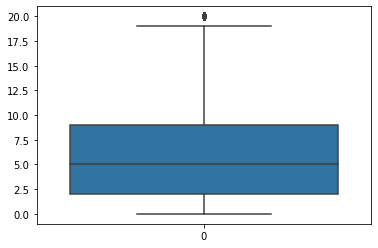

num_procedureevents 99 percentiles


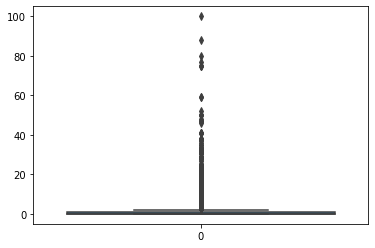

q_50= 0.0 q_99= 3.0
count    48976.000000
mean         0.452017
std          0.806802
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: num_procedureevents, dtype: float64


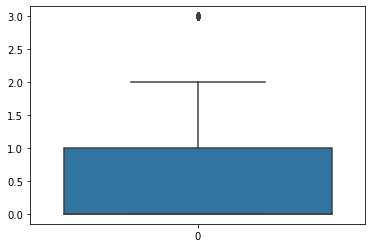

num_transfers 99 percentiles


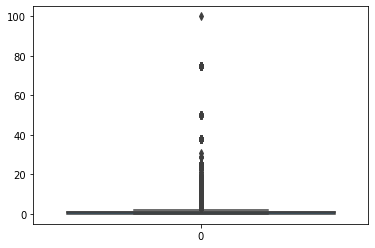

q_50= 1.0 q_99= 2.0
count    48976.000000
mean         0.737647
std          0.635001
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: num_transfers, dtype: float64


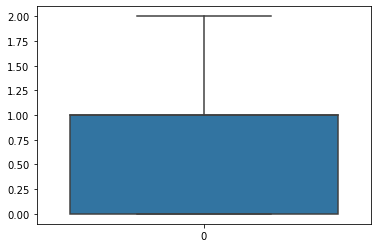

num_chartevents IQR approach


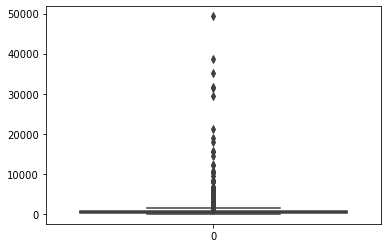

207.0 418.0 699.0 1437.0
2175


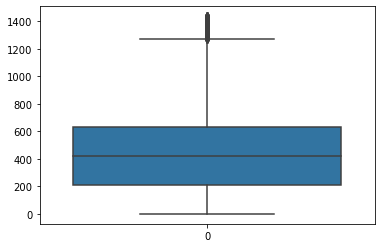

count    48976.000000
mean       453.724028
std        328.412406
min          0.000000
25%        207.000000
50%        418.000000
75%        634.000000
max       1437.000000
Name: num_chartevents, dtype: float64


In [7]:
for column in df_train.columns:
  if column.startswith(('num_input','num_labevents','num_chart')):  
   print(column, 'IQR approach')
   sns.boxplot(data=df_train[column])  
   plt.show()
   Q1 = df_train[column].quantile(0.25)
   Q3 = df_train[column].quantile(0.75) 
   IQR = Q3 - Q1  
   Q2 = df_train[column].quantile(0.5) 
   print(Q1,Q2,Q3,Q3 + 1.5 * IQR)
   print(((df_train[column]< (Q1 - 1.5 * IQR)) | (df_train[column] > (Q3 + 1.5 * IQR))).sum())
   df_train[column].where( ~((df_train[column]< (Q1 - 1.5 * IQR)) | (df_train[column] > (Q3 + 1.5 * IQR))) , Q2, inplace =True)
   sns.boxplot(data=df_train[column])  
   plt.show()
   print(df_train[column].describe())
  elif column.startswith('num'):  
   print(column, '99 percentiles')
   sns.boxplot(data=df_train[column])  
   plt.show()
   q_50 = df_train[column].quantile(0.50)
   q_99 = df_train[column].quantile(0.95)
   print('q_50=', q_50, 'q_99=', q_99)
   df_train[column] = np.where(df_train[column] > q_99, q_50, df_train[column])
   print(df_train[column].describe())
   sns.boxplot(data=df_train[column])  
   plt.show()


In [8]:
for column in df_train.columns:
  if column.startswith(('num_input','num_labevents','num_chart')):  
   print(column, 'IQR approach')
      
   df_check  = pd.DataFrame(df_train.groupby([column])['hospitalization'].mean().sort_values())
   df_check.insert(1,'counts',df_train[column].value_counts())
   print(df_check.sort_values(by ='counts').tail(50))
   del df_check
  elif column.startswith('num'):  
   print(column, '99 percentiles')
   df_check  = pd.DataFrame(df_train.groupby([column])['hospitalization'].mean().sort_values())
   df_check.insert(1,'counts',df_train[column].value_counts())
   print(df_check.sort_values(by ='counts').tail(50))
   del df_check

num_callouts 99 percentiles
              hospitalization  counts
num_callouts                         
2.0                  3.419196    3257
1.0                  7.205689   12704
0.0                 11.851213   33015
num_diagnoses 99 percentiles
               hospitalization  counts
num_diagnoses                         
7.0                   1.986479     463
6.0                   2.251616     730
5.0                   2.793073    1178
4.0                   3.635270    2275
3.0                   4.543992    4750
0.0                  30.360232    5248
2.0                   6.173031   11410
1.0                   9.967392   22922
num_procedures 99 percentiles
                hospitalization  counts
num_procedures                         
2.0                    3.269304    1997
1.0                    7.489018   16037
0.0                   11.871082   30942
num_cptevents 99 percentiles
               hospitalization  counts
num_cptevents                         
3.0                   9.60

#hospitalization

In [9]:
target_cat = pd.cut(df_train.hospitalization,bins=[-1,0.999,6.99,13.99,29.99,999],labels=['Day','Week','TwoWeeks','Month', 'More'])

In [10]:
target_cat.value_counts()

Week        24452
TwoWeeks    13086
Month        7008
More         2515
Day          1915
Name: hospitalization, dtype: int64

In [11]:
df_train.insert(0,'target_cat',target_cat)

In [12]:
df_train['target'] = df_train['target_cat'].map({'Day':0, 'Week':1,'TwoWeeks':2, 'Month':3, 'More':4})


In [13]:
df_train.head(20)

,target_cat,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,...,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id,target
0,Week,M,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,...,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0,1
1,Week,M,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,...,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1,1
2,Month,M,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,...,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2,3
3,TwoWeeks,F,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,...,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3,2
4,TwoWeeks,F,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,...,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4,2
5,TwoWeeks,F,62,8.00,EMERGENCY,TRANSFER FROM HOSP.,RESPIRATORY FAILURE,Private,NOT SPECIFIED,MARRIED,...,32.0,0.0,0.0,3.0,0.0,0.0,276.0,0,5,2
6,Week,F,48,2.92,EMERGENCY,CLINIC REFERRAL,ABDOMINAL PAIN,Medicare,PROTESTANT QUAKER,SINGLE,...,73.0,1.0,0.0,3.0,2.0,1.0,361.0,0,6,1
7,Week,F,61,2.13,EMERGENCY,CLINIC REFERRAL,HEART BLOCK,Government,PROTESTANT QUAKER,WIDOWED,...,42.0,0.0,1.0,3.0,3.0,1.0,477.0,0,7,1
8,TwoWeeks,F,81,7.38,EMERGENCY,EMERGENCY ROOM ADMISSION,LT HIP FRACTURE,Medicare,JEWISH,MARRIED,...,44.0,0.0,0.0,10.0,0.0,1.0,542.0,0,8,2
9,TwoWeeks,F,76,13.75,EMERGENCY,EMERGENCY ROOM ADMISSION,SUBDURAL HEMORRHAGE,Medicare,CATHOLIC,WIDOWED,...,37.0,3.0,0.0,6.0,0.0,0.0,421.0,0,9,2


#encoding gender

In [14]:
df_train['gender'] = df_train['gender'].map({'M':0, 'F':1})

df_train.head()

,target_cat,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,...,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id,target
0,Week,0,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,...,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0,1
1,Week,0,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,...,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1,1
2,Month,0,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,...,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2,3
3,TwoWeeks,1,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,...,22.0,1.0,0.0,1.0,0.0,0.0,38.0,0,3,2
4,TwoWeeks,1,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY/SDA,Medicare,NOT SPECIFIED,SINGLE,...,18.0,0.0,0.0,3.0,0.0,0.0,155.0,0,4,2


# admission_type

In [15]:
from sklearn.preprocessing import OneHotEncoder

admission_type_dummies = pd.get_dummies(df_train.admission_type, prefix='admission_type')
df_train = pd.concat([df_train, admission_type_dummies], axis=1)
print(df_train['admission_type'].value_counts())

EMERGENCY    34894
NEWBORN       6586
ELECTIVE      6379
URGENT        1117
Name: admission_type, dtype: int64


# admission_diagnosis



In [16]:
df_check_admission_diagnosis  = pd.DataFrame(df_train.groupby(['admission_diagnosis'])['hospitalization'].mean().sort_values())

df_check_admission_diagnosis.insert(1,'counts',df_train['admission_diagnosis'].value_counts())
df_check_admission_diagnosis.sort_values(by ='counts').tail(50)

,hospitalization,counts
admission_diagnosis,,
URINARY TRACT INFECTION;PYELONEPHRITIS,7.829123,114
CARDIAC ARREST,6.794483,116
BRAIN TUMOR/SDA,5.139076,119
HEAD BLEED,8.261176,119
UNSTABLE ANGINA,10.227063,126
ANEMIA,13.066953,128
GI BLEED,8.033047,128
ACUTE MYOCARDIAL INFARCTION,6.277154,130
AORTIC STENOSIS\AORTIC VALVE REPLACEMENT /SDA,7.135672,134


In [17]:


df_train['admission_diagnosis'] = df_train['admission_diagnosis'].replace(np.nan, 'NOT AVAILIABLE admission_diagnosis', regex=True)
# df_train['admission_diagnosis'] = df_train['admission_diagnosis'].replace([(';')],',')
   

In [18]:
df_train.admission_diagnosis = df_train.admission_diagnosis.str.replace('?', '')
df_train.admission_diagnosis = df_train.admission_diagnosis.str.replace(',', ';')
df_train.admission_diagnosis = df_train.admission_diagnosis.str.replace('\\', ';')
df_train.admission_diagnosis = df_train.admission_diagnosis.str.replace('/', ';')
df_train.admission_diagnosis = df_train.admission_diagnosis.str.strip()


In [19]:
! pip install category_encoders

import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder

In [20]:
X = df_train['admission_diagnosis']
y = df_train['hospitalization']

In [21]:
# binary_encoder = ce.BinaryEncoder(cols = ['admission_diagnosis'])
hashing_encoder = ce.HashingEncoder(cols = ['admission_diagnosis'] , n_components=5  )
# hashing_encoder.get_feature_names()
df_hash = hashing_encoder.fit_transform(X, y)


In [22]:
df_hash.columns = ['admission_diagnosis_hash_0', 'admission_diagnosis_hash_1', 'admission_diagnosis_hash_2', 'admission_diagnosis_hash_3', 'admission_diagnosis_hash_4']

df_hash.sum()

admission_diagnosis_hash_0     6807
admission_diagnosis_hash_1    10283
admission_diagnosis_hash_2    10880
admission_diagnosis_hash_3    14292
admission_diagnosis_hash_4     6714
dtype: int64

In [23]:
print(df_train['admission_diagnosis'].head())
df_train['count_diagnosis'] =df_train['admission_diagnosis'].apply(lambda x: len(x.split(';')))

df_train['count_diagnosis'].head()

0                               PNEUMONIA
1                                 SEIZURE
2    SCALP LACERATION;RESPIRATORY FAILURE
3                             CARDIAC DZ.
4                    ABDOMINAL LAXITY;SDA
Name: admission_diagnosis, dtype: object


0    1
1    1
2    2
3    1
4    2
Name: count_diagnosis, dtype: int64

In [24]:
df_check_count_diagnosis  = pd.DataFrame(df_train.groupby(['count_diagnosis'])['hospitalization'].mean().sort_values())

df_check_count_diagnosis.insert(1,'counts',df_train['count_diagnosis'].value_counts())
df_check_count_diagnosis.sort_values(by ='counts')

,hospitalization,counts
count_diagnosis,,
8,7.096667,3
7,9.894737,19
6,10.240556,54
5,8.921460,226
4,9.167500,876
3,8.684753,4088
2,9.899286,11294
1,10.360011,32416


In [25]:
df_train=  pd.concat([df_train, df_hash], axis=1)
df_train.shape

(48976, 37)

# insurance

In [26]:
# df_train['insurance'] = df_train['insurance'].replace(['?'],np.NaN)
# df_train['insurance'] = df_train['insurance'].replace('', np.NaN)
# df_train [ 'insurance']= df_train['insurance'].replace(r'^\s*$', np.nan, regex=True)
df_train['insurance']=df_train['insurance'].replace(['?', ' ', np.nan], 'Not specified')

insurance_dummies = pd.get_dummies(df_train.insurance, prefix='insurance')
df_train = pd.concat([df_train, insurance_dummies], axis=1)
df_train.head()


,target_cat,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,...,admission_diagnosis_hash_1,admission_diagnosis_hash_2,admission_diagnosis_hash_3,admission_diagnosis_hash_4,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Not specified,insurance_Private,insurance_Self Pay
0,Week,0,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,...,1,0,0,0,0,0,1,0,0,0
1,Week,0,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,...,1,0,0,0,1,0,0,0,0,0
2,Month,0,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,...,1,0,0,0,1,0,0,0,0,0
3,TwoWeeks,1,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER,MARRIED,...,0,0,0,1,0,0,0,0,1,0
4,TwoWeeks,1,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY;SDA,Medicare,NOT SPECIFIED,SINGLE,...,0,1,0,0,0,0,1,0,0,0


In [27]:
print(df_train['insurance'].value_counts())

Medicare         22590
Private          18196
Medicaid          4689
Not specified     1578
Government        1434
Self Pay           489
Name: insurance, dtype: int64


# Religion

In [28]:
df_check_religion  = pd.DataFrame(df_train.groupby(['religion'])['hospitalization'].mean().sort_values())

df_check_religion.insert(1,'counts',df_train['religion'].value_counts())
df_check_religion.sort_values(by ='counts')

,hospitalization,counts
religion,,
METHODIST,7.074000,5
HEBREW,8.598571,14
BAPTIST,11.598696,23
7TH DAY ADVENTIST,14.191231,65
ROMANIAN EAST. ORTH,14.732576,66
HINDU,7.867000,90
UNITARIAN-UNIVERSALIST,9.759307,101
JEHOVAH'S WITNESS,11.545328,122
MUSLIM,10.690374,187


In [29]:

df_train['religion'] = df_train['religion'].replace([('NOT SPECIFIED', 'UNOBTAINABLE')],np.NaN)

df_train['religion'] = df_train['religion'].replace(np.nan, 'NOT AVAILIABLE RELIGION', regex=True)
    
val = df_train['religion'].value_counts()
y = val[val < 2500].index
df_train['religion']  = df_train['religion'].replace({x:'OTHER RELIGION' for x in y})
print(y)

Index(['OTHER', 'EPISCOPALIAN', 'STAN', 'GREEK ORTHODOX',
       'CHRISTIAN SCIENTIST', 'SCIENTOLOGY', 'BUDDHIST', 'MUSLIM',
       'JEHOVAH'S WITNESS', 'UNITARIAN-UNIVERSALIST', 'HINDU',
       'ROMANIAN EAST. ORTH', '7TH DAY ADVENTIST', 'BAPTIST', 'HEBREW',
       'METHODIST'],
      dtype='object')


In [30]:
df_check_religion  = pd.DataFrame(df_train.groupby(['religion'])['hospitalization'].mean().sort_values())

df_check_religion.insert(1,'counts',df_train['religion'].value_counts())
df_check_religion.sort_values(by ='counts')

,hospitalization,counts
religion,,
JEWISH,9.303236,4357
OTHER RELIGION,10.453339,5265
PROTESTANT QUAKER,10.499466,5824
NOT AVAILIABLE RELIGION,9.671776,16665
CATHOLIC,10.438490,16865


In [31]:
religion_dummies = pd.get_dummies(df_train.religion)
df_train = pd.concat([df_train, religion_dummies], axis=1)
df_train.head()

,target_cat,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,...,insurance_Medicaid,insurance_Medicare,insurance_Not specified,insurance_Private,insurance_Self Pay,CATHOLIC,JEWISH,NOT AVAILIABLE RELIGION,OTHER RELIGION,PROTESTANT QUAKER
0,Week,0,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT AVAILIABLE RELIGION,DIVORCED,...,0,1,0,0,0,0,0,1,0,0
1,Week,0,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT AVAILIABLE RELIGION,SINGLE,...,0,0,0,0,0,0,0,1,0,0
2,Month,0,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,NOT AVAILIABLE RELIGION,DIVORCED,...,0,0,0,0,0,0,0,1,0,0
3,TwoWeeks,1,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER RELIGION,MARRIED,...,0,0,0,1,0,0,0,0,1,0
4,TwoWeeks,1,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY;SDA,Medicare,NOT AVAILIABLE RELIGION,SINGLE,...,0,1,0,0,0,0,0,1,0,0


# Marital_status

In [32]:
print(df_train['marital_status'].value_counts())
print(len(df_train['marital_status'].value_counts()))
print(sum(df_train['marital_status'].value_counts()))

df_train['marital_status']=df_train['marital_status'].replace(['?','UNKNOWN (DEFAULT)','Not specified', np.nan], 'Not specified')
df_train['marital_status']=df_train['marital_status'].replace(['SEPARATED'], 'DIVORCED')
df_train['marital_status']=df_train['marital_status'].replace(['LIFE PARTNER'], 'MARRIED')


print(df_train['marital_status'].value_counts())
print(len(df_train['marital_status'].value_counts()))
print(sum(df_train['marital_status'].value_counts()))

MARRIED              19935
SINGLE               10968
WIDOWED               5947
DIVORCED              2672
SEPARATED              472
UNKNOWN (DEFAULT)      284
?                       37
LIFE PARTNER            12
Name: marital_status, dtype: int64
8
40327
MARRIED          19947
SINGLE           10968
Not specified     8970
WIDOWED           5947
DIVORCED          3144
Name: marital_status, dtype: int64
5
48976


In [33]:
marital_status_onehot=pd.get_dummies(df_train.marital_status, prefix='marital_status')
print(marital_status_onehot)
df_train=pd.concat([df_train, marital_status_onehot], axis=1)
print(df_train.columns)

       marital_status_DIVORCED  marital_status_MARRIED  \
0                            1                       0   
1                            0                       0   
2                            1                       0   
3                            0                       1   
4                            0                       0   
...                        ...                     ...   
48971                        0                       1   
48972                        0                       0   
48973                        0                       1   
48974                        0                       0   
48975                        0                       1   

       marital_status_Not specified  marital_status_SINGLE  \
0                                 0                      0   
1                                 0                      1   
2                                 0                      0   
3                                 0                    

#ethnicity

In [34]:
df_check_ethnicity  = pd.DataFrame(df_train.groupby(['ethnicity'])['hospitalization'].mean().sort_values())

df_check_ethnicity.insert(1,'counts',df_train['ethnicity'].value_counts())
df_check_ethnicity.sort_values(by ='counts')

,hospitalization,counts
ethnicity,,
ASIAN - THAI,4.890000,3
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,16.420000,3
HISPANIC/LATINO - HONDURAN,11.542500,4
ASIAN - JAPANESE,3.716667,6
SOUTH AMERICAN,11.833333,6
CARIBBEAN ISLAND,4.508571,7
ASIAN - KOREAN,5.548750,8
HISPANIC/LATINO - COLOMBIAN,10.432500,8
HISPANIC/LATINO - MEXICAN,6.967778,9


In [35]:

df_train['ethnicity'] = df_train['ethnicity'].replace([('NOT SPECIFIED', '?','UNKNOWN/NOT SPECIFIED','UNABLE TO OBTAIN','PATIENT DECLINED TO ANSWER','UNKNOWN')],np.NaN)
df_train['ethnicity'] = df_train['ethnicity'].replace(np.nan, 'NOT AVAILIABLE ETHNICITY', regex=True)
    
val = df_train['ethnicity'].value_counts()
y = val[val < 2500].index
df_train['ethnicity']  = df_train['ethnicity'] .replace({x:'OTHER ETHNICITY' for x in y})
print(y)


Index(['GUERO', 'HISPANIC OR LATINO', 'OTHER', 'ASIAN', 'UNK',
       'ASIAN - CHINESE', 'CAUCATIAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'BLACK/CAPE VERDEAN', 'WHITE - RUSSIAN', 'MULTI RACE ETHNICITY',
       'BLACK/HAITIAN', 'ASIAN - ASIAN INDIAN', 'WHITE - OTHER EUROPEAN',
       'HISPANIC/LATINO - DOMINICAN', 'WHITE - BRAZILIAN', 'PORTUGUESE',
       'ASIAN - VIETNAMESE', 'AMERICAN INDIAN/ALASKA NATIVE', 'MIDDLE EASTERN',
       'BLACK/AFRICAN', 'HISPANIC/LATINO - GUATEMALAN',
       'WHITE - EASTERN EUROPEAN', 'ASIAN - FILIPINO',
       'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATINO - SALVADORAN',
       'ASIAN - CAMBODIAN', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'ASIAN - OTHER', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'HISPANIC/LATINO - MEXICAN', 'HISPANIC/LATINO - COLOMBIAN',
       'ASIAN - KOREAN', 'CARIBBEAN ISLAND', 'ASIAN - JAPANESE',
       'SOUTH AMERICAN', 'HISPANIC/LATINO - HONDURAN',
       'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED

In [36]:
df_check_ethnicity  = pd.DataFrame(df_train.groupby(['ethnicity'])['hospitalization'].mean().sort_values())
df_check_ethnicity.insert(1,'counts',df_train['ethnicity'].value_counts())
df_check_ethnicity.sort_values(by ='counts')

,hospitalization,counts
ethnicity,,
NOT AVAILIABLE ETHNICITY,10.567855,4378
BLACK/AFRICAN AMERICAN,10.315626,4529
OTHER ETHNICITY,9.806600,8440
CAUCASIAN,10.029560,11169
WHITE,10.076823,20460


In [37]:
ethnicity_dummies = pd.get_dummies(df_train.ethnicity)
df_train = pd.concat([df_train, ethnicity_dummies], axis=1)
df_train.head()

,target_cat,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,...,marital_status_DIVORCED,marital_status_MARRIED,marital_status_Not specified,marital_status_SINGLE,marital_status_WIDOWED,BLACK/AFRICAN AMERICAN,CAUCASIAN,NOT AVAILIABLE ETHNICITY,OTHER ETHNICITY,WHITE
0,Week,0,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT AVAILIABLE RELIGION,DIVORCED,...,1,0,0,0,0,0,0,0,0,1
1,Week,0,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT AVAILIABLE RELIGION,SINGLE,...,0,0,0,1,0,0,0,1,0,0
2,Month,0,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,NOT AVAILIABLE RELIGION,DIVORCED,...,1,0,0,0,0,1,0,0,0,0
3,TwoWeeks,1,51,13.79,URGENT,TRANSFER FROM HOSPITAL,CARDIAC DZ.,Private,OTHER RELIGION,MARRIED,...,0,1,0,0,0,0,0,1,0,0
4,TwoWeeks,1,72,9.21,ELECTIVE,NaN,ABDOMINAL LAXITY;SDA,Medicare,NOT AVAILIABLE RELIGION,SINGLE,...,0,0,0,1,0,0,0,0,0,1


# admission_origin

In [38]:
df_check_origin  = pd.DataFrame(df_train.groupby(['admission_origin'])['hospitalization'].mean().sort_values())

df_check_origin.insert(1,'counts',df_train['admission_origin'].value_counts())

In [39]:
df_check_origin

,hospitalization,counts
admission_origin,,
TRANFSER FROM SAME HOSP.,1.750000,1
INTERNAL TRANSFER,2.605000,2
?,4.044000,25
NOT AVAILABLE,5.023458,107
TRANSFER FROM SAME HOSPITAL,5.210000,1
HMO REFERRAL,5.363736,91
TRANSFER FROM OHTER HEALTH CENTER,6.170000,1
PHYSICAL REFERRAL,7.857509,285
REFERRAL,8.230094,637


In [40]:
df_train['admission_origin']=df_train['admission_origin'].replace(['?','NOT AVAIL.' , 'NOT AVAILABLE', np.nan],  'NOT AVAILABLE')

df_train['admission_origin']=df_train['admission_origin'].str.strip(' ')

df_train['admission_origin']=df_train['admission_origin'].replace(['EMERGENCY ROOM ADMISSION', 'ADMITTED FROM EMERGENCY', 'ER ADMISSION', 'ADMITTED FRIM EMERGENCY', 'EMERGENCY ROOM ADMIT', 'ER ADMIT', 'EMERG. ROOM ADMISSION'], 'EMERGENCY ROOM ADMISSION')
df_train['admission_origin']=df_train['admission_origin'].replace(['TRANSFER FROM HOSPITAL', 'TRANFSER FROM HOSPITAL', 'TFH', 'TRANSFER FROM HOSP.', 'HOSP. TRAN.', 'HOSPITAL TRANSFER', 'TRANS FRM HPL'], 'Transfer from hospital/Extram')
df_train['admission_origin']=df_train['admission_origin'].replace(['TRANSFER FROM OTHER HEALTH CENTER', 'TRNS FR HEALTH CNTR', 'TRANSFER FROM OTHER  HEALTH CENTER', 'TRANSFER FROM OHTER HEALTH CENTER'], 'Transfer from other health center')
df_train['admission_origin']=df_train['admission_origin'].replace(['CLINIC REFERRAL', 'CLINIC REFERAL', 'CLINIC', 'FROM CLINIC', 'CLINIC  REFERRAL', 'CINIC REFERRAL'], 'Clinic referral/Premature')
df_train['admission_origin']=df_train['admission_origin'].replace(['TRANSFER FROM SKILLED NURSE', 'TRANS FRM SKL NURSE'], 'Transfer from skilled nurse')
df_train['admission_origin']=df_train['admission_origin'].replace(['INTERNAL TRANSFER', 'TRANFSER FROM SAME HOSP.', 'TRANSFER FROM SAME HOSPITAL'], 'Transfer within this facility')
df_train['admission_origin']=df_train['admission_origin'].replace(['HMO REFERRAL', 'HMO REFERAL', 'REFERRAL'], 'HMO referral/Sick')
df_train['admission_origin']=df_train['admission_origin'].replace(['PHYSICAL REFERRAL', 'PHYS REFERRAL', 'PHYSICAL  REFERRAL', 'PHYSICAL   REFERRAL'], 'Physical referral/Normal deli')

val = df_train['admission_origin'].value_counts()
y = val[val < 2500].index
df_train['admission_origin']  = df_train['admission_origin'] .replace({x:'OTHER ADMISSION ORIGIN' for x in y})
print(y)

print(df_train['admission_origin'].value_counts())
print(len(df_train['admission_origin'].value_counts()))
print(sum(df_train['admission_origin'].value_counts()))





Index(['HMO referral/Sick', 'Transfer from skilled nurse',
       'Transfer from other health center', 'Transfer within this facility'],
      dtype='object')
EMERGENCY ROOM ADMISSION         17170
Physical referral/Normal deli    10718
Clinic referral/Premature         9255
Transfer from hospital/Extram     6921
NOT AVAILABLE                     3713
OTHER ADMISSION ORIGIN            1199
Name: admission_origin, dtype: int64
6
48976


In [41]:
admission_origin_onehot=pd.get_dummies(df_train.admission_origin, prefix='admission_origin')
print(admission_origin_onehot)
df_train=pd.concat([df_train, admission_origin_onehot], axis=1)
print(df_train.columns)

       admission_origin_Clinic referral/Premature  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
48971                                           1   
48972                                           0   
48973                                           0   
48974                                           1   
48975                                           0   

       admission_origin_EMERGENCY ROOM ADMISSION  \
0                                              0   
1                                              1   
2                                              1   
3                                              0   
4                                              0   
...                                          ...   

# num_procedures

In [42]:
# df_train.plot(x='num_procedures', y='hospitalization', style='o')

In [43]:
# df_train.num_procedures.describe()

In [44]:
# df_train.num_procedures.value_counts().sort_values()

In [45]:
# df_check_num_procedures  = pd.DataFrame(df_train.groupby(['num_procedures'])['hospitalization'].mean().sort_values())

# df_check_num_procedures.insert(1,'counts',df_train['num_procedures'].value_counts())



# df_check_num_procedures

In [46]:
# df_train.loc[df_train.num_procedures >= 3, 'num_procedures'] = 3


In [47]:
# df_check_num_procedures  = pd.DataFrame(df_train.groupby(['num_procedures'])['hospitalization'].mean().sort_values())

# df_check_num_procedures



# admission_procedure

In [48]:
df_check_admission_procedure  = pd.DataFrame(df_train.groupby(['admission_procedure'])['hospitalization'].mean().sort_values())

df_check_admission_procedure.insert(1,'counts',df_train['admission_procedure'].value_counts())
df_check_admission_procedure.sort_values(by='counts').tail(20)

,hospitalization,counts
admission_procedure,,
Other brain excision,8.399148,481
Entral infus nutrit sub,12.465130,501
Hemodialysis,7.599847,522
Other phototherapy,9.603602,522
Aortocor bypas-3 cor art,8.690505,772
Sm bowel endoscopy NEC,6.179672,792
Temporary tracheostomy,28.169963,804
Non-invasive mech vent,13.488337,824
Aortocor bypas-2 cor art,8.736359,846


#final df

In [49]:
df_train

,target_cat,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,...,CAUCASIAN,NOT AVAILIABLE ETHNICITY,OTHER ETHNICITY,WHITE,admission_origin_Clinic referral/Premature,admission_origin_EMERGENCY ROOM ADMISSION,admission_origin_NOT AVAILABLE,admission_origin_OTHER ADMISSION ORIGIN,admission_origin_Physical referral/Normal deli,admission_origin_Transfer from hospital/Extram
0,Week,0,66,5.92,EMERGENCY,Clinic referral/Premature,PNEUMONIA,Medicare,NOT AVAILIABLE RELIGION,DIVORCED,...,0,0,0,1,1,0,0,0,0,0
1,Week,0,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT AVAILIABLE RELIGION,SINGLE,...,0,1,0,0,0,1,0,0,0,0
2,Month,0,51,18.00,EMERGENCY,EMERGENCY ROOM ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,NOT AVAILIABLE RELIGION,DIVORCED,...,0,0,0,0,0,1,0,0,0,0
3,TwoWeeks,1,51,13.79,URGENT,Transfer from hospital/Extram,CARDIAC DZ.,Private,OTHER RELIGION,MARRIED,...,0,1,0,0,0,0,0,0,0,1
4,TwoWeeks,1,72,9.21,ELECTIVE,NOT AVAILABLE,ABDOMINAL LAXITY;SDA,Medicare,NOT AVAILIABLE RELIGION,SINGLE,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48971,Week,1,33,2.71,EMERGENCY,Clinic referral/Premature,ABNORMAL EEG,Private,NOT AVAILIABLE RELIGION,MARRIED,...,0,0,0,1,1,0,0,0,0,0
48972,Week,1,52,3.58,EMERGENCY,OTHER ADMISSION ORIGIN,PNEUMONIA,Medicare,CATHOLIC,WIDOWED,...,0,0,0,1,0,0,0,1,0,0
48973,Week,1,44,2.08,EMERGENCY,EMERGENCY ROOM ADMISSION,ACUTE RENAL FAILURE,Government,CATHOLIC,MARRIED,...,0,0,0,1,0,1,0,0,0,0
48974,Month,0,63,19.04,EMERGENCY,Clinic referral/Premature,ENCEPHALOPATHY,Medicare,CATHOLIC,SINGLE,...,0,0,0,1,1,0,0,0,0,0


In [50]:
df_final = df_train.drop(['hospitalization','patient_id', 'target_cat','admission_type','admission_origin','admission_diagnosis','insurance','religion' ,'marital_status','ethnicity' ,'admission_procedure'], axis=1)


In [51]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
 
X = df_final.drop(['target'], axis=1)
 
# X.head()
target = df_final['target']
 
rfc = RandomForestClassifier(random_state=0)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='f1_weighted')
rfecv.fit(X, target)



RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=0), scoring='f1_weighted')

In [52]:
max(rfecv.grid_scores_)

0.7454397898071541

Optimal number of features: 36


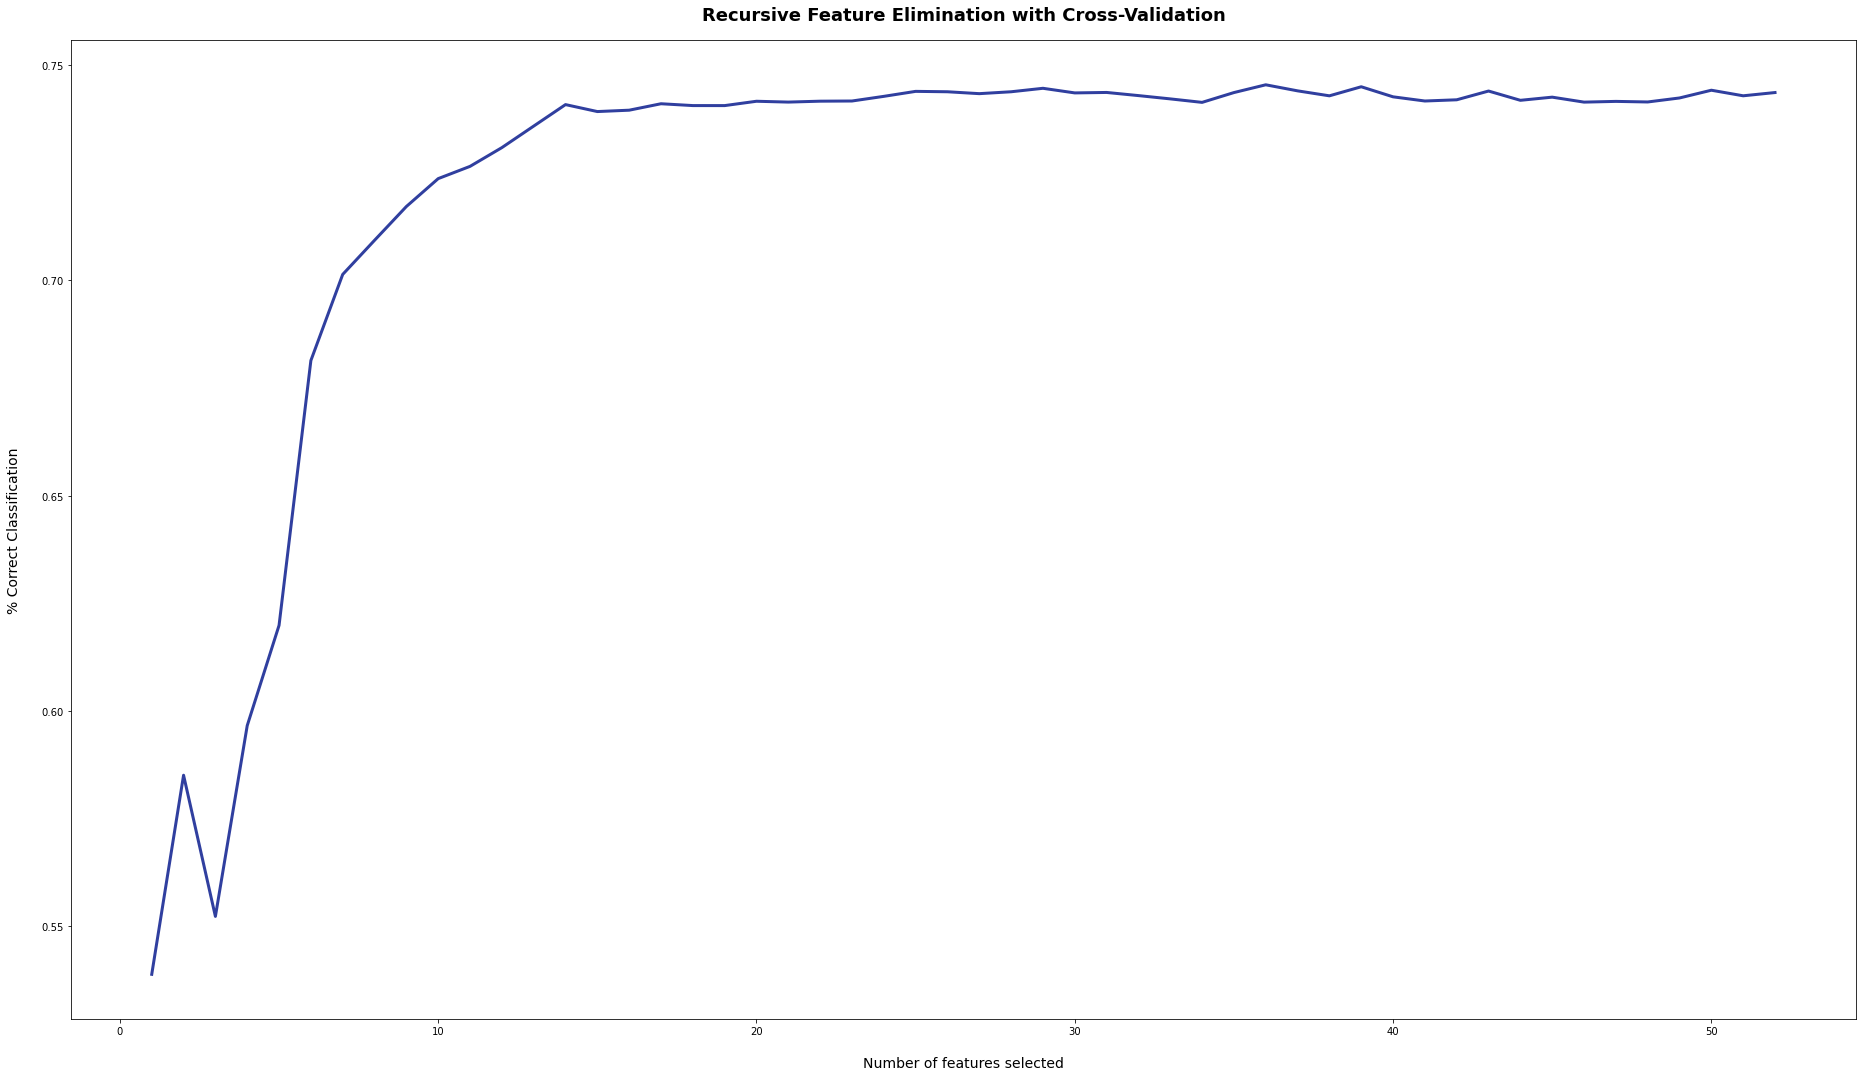

In [53]:
print('Optimal number of features: {}'.format(rfecv.n_features_))
plt.figure(figsize=(32, 18))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

In [54]:
print(np.where(rfecv.support_ == False)[0])
 
print(X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True))

[15 17 18 25 26 28 30 32 36 38 40 41 43 48 49 51]
None


In [55]:
X.columns

Index(['gender', 'age', 'num_callouts', 'num_diagnoses', 'num_procedures',
       'num_cptevents', 'num_inputevents', 'num_labevents',
       'num_microbiologyevents', 'num_noteevents', 'num_outputevents',
       'num_procedureevents', 'num_transfers', 'num_chartevents', 'expired',
       'admission_type_EMERGENCY', 'count_diagnosis',
       'admission_diagnosis_hash_0', 'admission_diagnosis_hash_1',
       'admission_diagnosis_hash_2', 'admission_diagnosis_hash_3',
       'admission_diagnosis_hash_4', 'insurance_Medicare', 'insurance_Private',
       'CATHOLIC', 'NOT AVAILIABLE RELIGION', 'OTHER RELIGION',
       'PROTESTANT QUAKER', 'marital_status_MARRIED', 'marital_status_SINGLE',
       'CAUCASIAN', 'OTHER ETHNICITY', 'WHITE',
       'admission_origin_Clinic referral/Premature',
       'admission_origin_EMERGENCY ROOM ADMISSION',
       'admission_origin_Physical referral/Normal deli'],
      dtype='object')

In [56]:
df_final.columns

Index(['gender', 'age', 'num_callouts', 'num_diagnoses', 'num_procedures',
       'num_cptevents', 'num_inputevents', 'num_labevents',
       'num_microbiologyevents', 'num_noteevents', 'num_outputevents',
       'num_procedureevents', 'num_transfers', 'num_chartevents', 'expired',
       'target', 'admission_type_ELECTIVE', 'admission_type_EMERGENCY',
       'admission_type_NEWBORN', 'admission_type_URGENT', 'count_diagnosis',
       'admission_diagnosis_hash_0', 'admission_diagnosis_hash_1',
       'admission_diagnosis_hash_2', 'admission_diagnosis_hash_3',
       'admission_diagnosis_hash_4', 'insurance_Government',
       'insurance_Medicaid', 'insurance_Medicare', 'insurance_Not specified',
       'insurance_Private', 'insurance_Self Pay', 'CATHOLIC', 'JEWISH',
       'NOT AVAILIABLE RELIGION', 'OTHER RELIGION', 'PROTESTANT QUAKER',
       'marital_status_DIVORCED', 'marital_status_MARRIED',
       'marital_status_Not specified', 'marital_status_SINGLE',
       'marital_status_WID

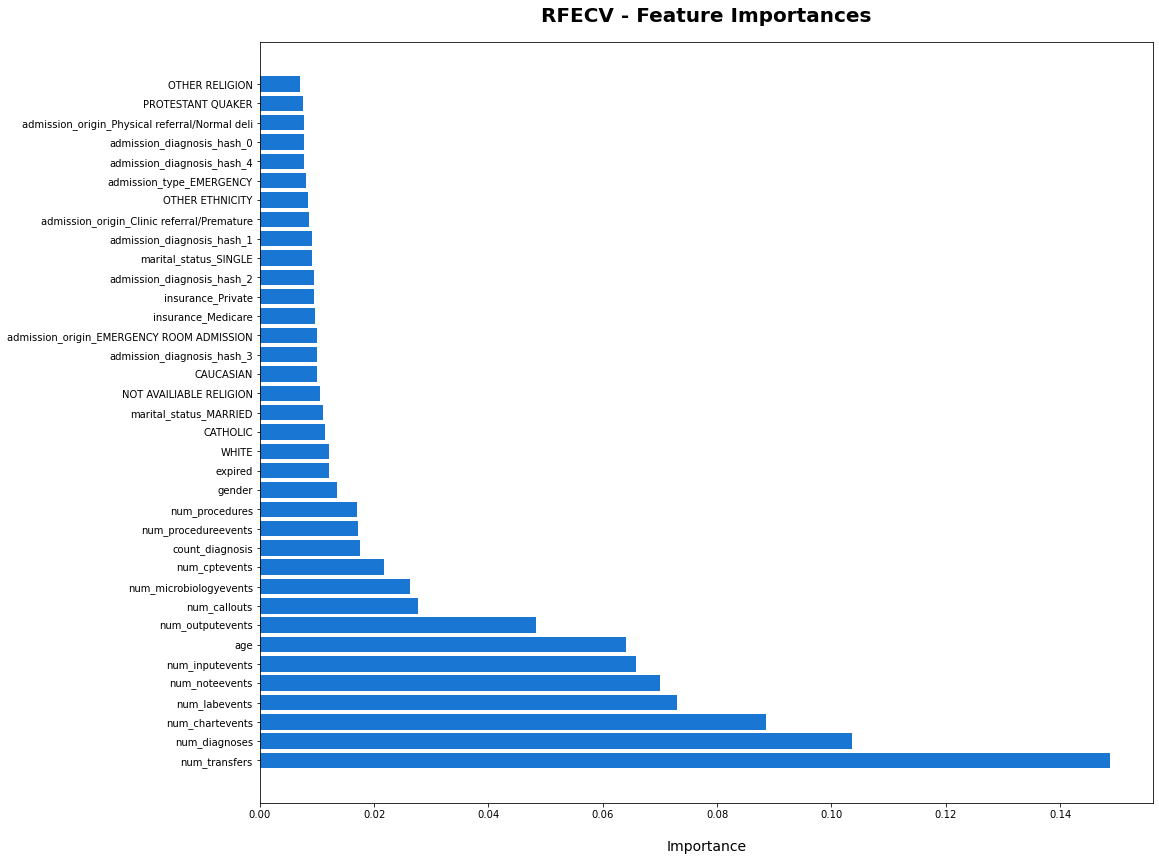

In [57]:
#feature importance
rfecv.estimator_.feature_importances_
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [58]:
X.to_csv('pre_pro.csv')